<a href="https://colab.research.google.com/github/bgittel/Zauberberg/blob/main/Code/Zauberberg_DH_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import json




Mounted at /content/drive


In [14]:
!gdown --id 1-3eAh_lq5UZZP-VwVe-BJxlrzvbWy0vG

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1-3eAh_lq5UZZP-VwVe-BJxlrzvbWy0vG
From (redirected): https://drive.google.com/uc?id=1-3eAh_lq5UZZP-VwVe-BJxlrzvbWy0vG&confirm=t&uuid=f487123b-059d-4274-a3c5-8afa94c7b3fc
To: /content/zauberberg_dh_vars.pkl.pkl'
100% 2.96G/2.96G [00:40<00:00, 72.4MB/s]


# Erzählprosa Weimarer Zeit

In [76]:
import io
import pandas as pd
df_weimar = pd.read_csv('/content/drive/MyDrive/zauber_results/weimar_fiction_1918_1945_reflections.csv', delimiter = ";")
df_weimar

,Unnamed: 0.1,Unnamed: 0,index_of_processed_files,annotator_2nd_anno,check_fiction_status,Fiktionalitätsstatus_2nd_anno,Fiktionalitätsstatus_unsicher_2nd_anno,Kommentar_2nd_anno,author_forename,author_surname,...,not_after,classification,number_of_works,canonisation_score,rank_canon,author_nationality_d_prose,refl_clauses_perc,nfr_clauses_perc,gi_clauses_perc,comment_clauses_perc
0,0,3.0,3.0,Frida,True,fik,NaN,NaN,Klabund,NaN,...,1928.0,FIK,101.0,NaN,NaN,NaN,30.000000,26.666667,23.333333,23.333333
1,25,50.0,50.0,NaN,False,NaN,NaN,NaN,Paul,Ernst,...,1933.0,FIK,76.0,NaN,NaN,Deutschland,37.383178,7.943925,30.373832,14.953271
2,38,75.0,75.0,Frida,True,fik,NaN,NaN,Paul,Ernst,...,1933.0,FIK,76.0,NaN,NaN,Deutschland,53.488372,10.077519,41.085271,27.519380
3,40,79.0,79.0,NaN,False,NaN,NaN,NaN,Klabund,NaN,...,1928.0,FIK,101.0,NaN,NaN,NaN,29.208925,6.288032,13.793103,24.543611
4,53,99.0,99.0,NaN,False,NaN,NaN,NaN,Paul,Ernst,...,1933.0,FIK,76.0,NaN,NaN,NaN,54.225352,3.521127,49.295775,6.338028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,6172,9417.0,9417.0,NaN,False,NaN,NaN,NaN,Wolfgang,Hellmert,...,NaN,FIK,1.0,NaN,NaN,NaN,18.013166,2.752843,7.510473,14.093357
610,6208,9456.0,9456.0,NaN,False,NaN,NaN,NaN,Ernst,Jaedicke,...,NaN,U,1.0,NaN,NaN,NaN,22.435533,6.406907,17.289560,3.589685
611,6209,9458.0,9458.0,NaN,False,NaN,NaN,NaN,A. Th. Sonnleitner,NaN,...,NaN,FIK,3.0,NaN,NaN,Österreich,17.896302,0.854860,15.777736,2.769002
612,6210,9459.0,9459.0,NaN,False,NaN,NaN,NaN,A. Th. Sonnleitner,NaN,...,NaN,FIK,3.0,NaN,NaN,Österreich,11.282051,0.192308,9.839744,1.666667


In [3]:
len(df_weimar)

614

In [4]:
# Anzahl Autoren
df_weimar["author_joined"] = df_weimar["author_forename"] + " " + df_weimar["author_surname"]
df_weimar['author_joined'].nunique()

157

In [5]:
# List of strings to search for
#search_strings = ['Zauberberg', 'Eigenschaften', 'Schlafwandler', 'Erfolg', 'Alexanderplatz', 'Steppenwolf', 'kunstseidene', 'Im Westen', 'Radetzkymarsch', 'Maurizius']
search_strings = ["Zauberberg", "Der Mann ohne Eigenschaften", "Das kunstseidene Mädchen", "Die Stadt des Hirns", "Der Steppenwolf", "Die Schlafwandler", "Im Westen nichts Neues", "Berlin Alexanderplatz", "Radetzkymarsch", "Der Untertan", "Kleiner Mann", "Fabian"]


# Use str.contains() to search for multiple strings
filtered_df = df_weimar[~df_weimar['title_main'].str.contains('|'.join(search_strings))]

filtered_df ## ohne die werke

,Unnamed: 0.1,Unnamed: 0,index_of_processed_files,annotator_2nd_anno,check_fiction_status,Fiktionalitätsstatus_2nd_anno,Fiktionalitätsstatus_unsicher_2nd_anno,Kommentar_2nd_anno,author_forename,author_surname,...,classification,number_of_works,canonisation_score,rank_canon,author_nationality_d_prose,refl_clauses_perc,nfr_clauses_perc,gi_clauses_perc,comment_clauses_perc,author_joined
0,0,3.0,3.0,Frida,True,fik,NaN,NaN,Klabund,NaN,...,FIK,101.0,NaN,NaN,NaN,30.000000,26.666667,23.333333,23.333333,NaN
1,25,50.0,50.0,NaN,False,NaN,NaN,NaN,Paul,Ernst,...,FIK,76.0,NaN,NaN,Deutschland,37.383178,7.943925,30.373832,14.953271,Paul Ernst
2,38,75.0,75.0,Frida,True,fik,NaN,NaN,Paul,Ernst,...,FIK,76.0,NaN,NaN,Deutschland,53.488372,10.077519,41.085271,27.519380,Paul Ernst
3,40,79.0,79.0,NaN,False,NaN,NaN,NaN,Klabund,NaN,...,FIK,101.0,NaN,NaN,NaN,29.208925,6.288032,13.793103,24.543611,NaN
4,53,99.0,99.0,NaN,False,NaN,NaN,NaN,Paul,Ernst,...,FIK,76.0,NaN,NaN,NaN,54.225352,3.521127,49.295775,6.338028,Paul Ernst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,6172,9417.0,9417.0,NaN,False,NaN,NaN,NaN,Wolfgang,Hellmert,...,FIK,1.0,NaN,NaN,NaN,18.013166,2.752843,7.510473,14.093357,Wolfgang Hellmert
610,6208,9456.0,9456.0,NaN,False,NaN,NaN,NaN,Ernst,Jaedicke,...,U,1.0,NaN,NaN,NaN,22.435533,6.406907,17.289560,3.589685,Ernst Jaedicke
611,6209,9458.0,9458.0,NaN,False,NaN,NaN,NaN,A. Th. Sonnleitner,NaN,...,FIK,3.0,NaN,NaN,Österreich,17.896302,0.854860,15.777736,2.769002,NaN
612,6210,9459.0,9459.0,NaN,False,NaN,NaN,NaN,A. Th. Sonnleitner,NaN,...,FIK,3.0,NaN,NaN,Österreich,11.282051,0.192308,9.839744,1.666667,NaN


In [6]:
#df_weimar.equals(filtered_df)
pd.concat([df_weimar, filtered_df]).drop_duplicates(keep=False)

,Unnamed: 0.1,Unnamed: 0,index_of_processed_files,annotator_2nd_anno,check_fiction_status,Fiktionalitätsstatus_2nd_anno,Fiktionalitätsstatus_unsicher_2nd_anno,Kommentar_2nd_anno,author_forename,author_surname,...,classification,number_of_works,canonisation_score,rank_canon,author_nationality_d_prose,refl_clauses_perc,nfr_clauses_perc,gi_clauses_perc,comment_clauses_perc,author_joined
514,5307,8294.0,8294.0,NaN,False,NaN,NaN,NaN,Joseph,Roth,...,FUF,19.0,NaN,NaN,NaN,27.871319,2.777296,21.200023,9.500665,Joseph Roth
530,5432,8477.0,8477.0,Janina,True,fik,NaN,NaN,Robert,Musil,...,FIK,12.0,NaN,NaN,NaN,49.608554,22.242142,34.235745,36.909445,Robert Musil


In [ ]:
#df_weimar_plus10 = pd.concat([df_weimar, df], ignore_index=True)
#df_weimar_plus10

In [7]:
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


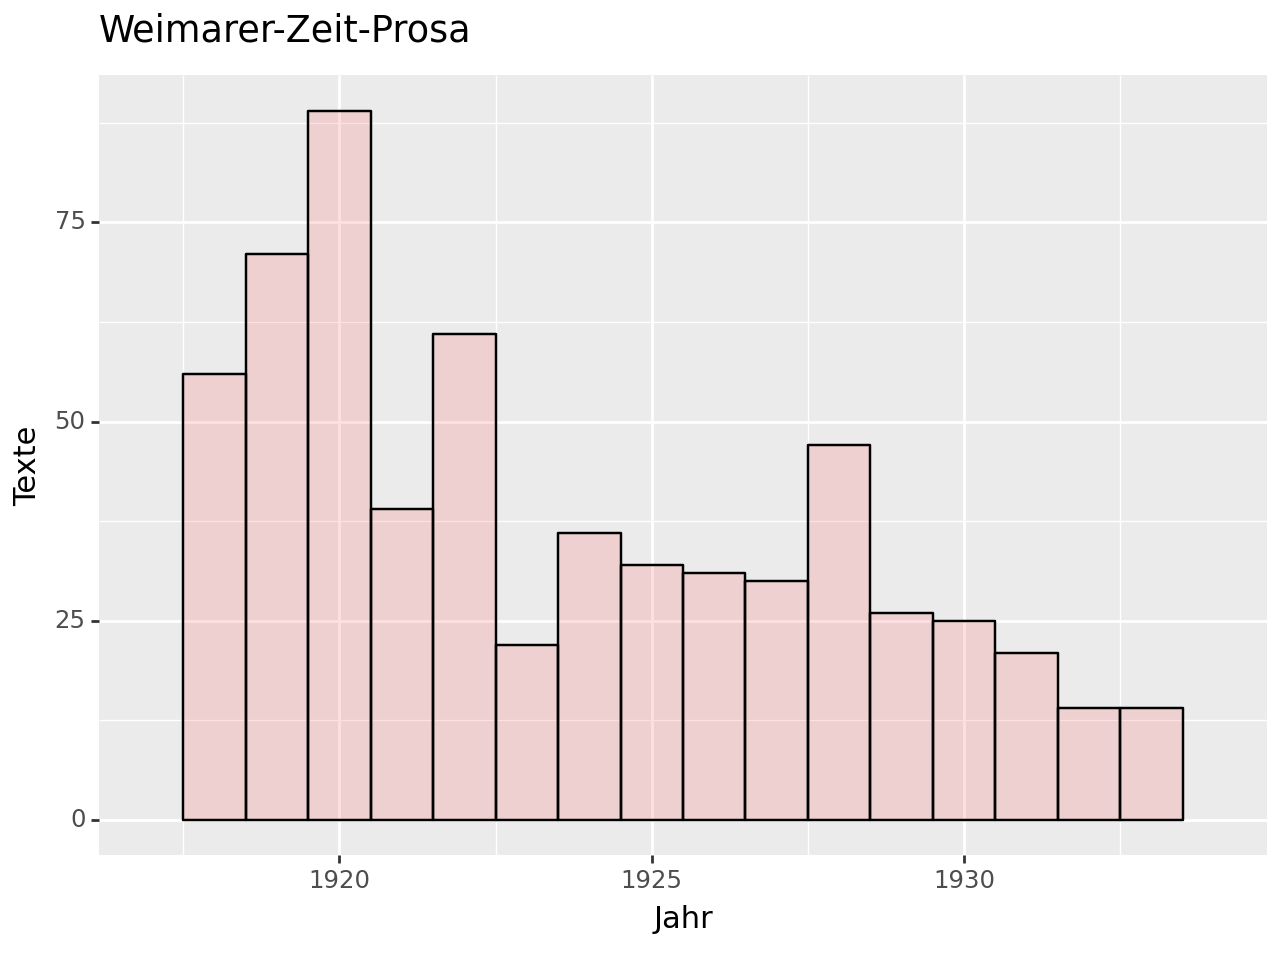

<Figure Size: (640 x 480)>

In [ ]:
#ggplot(df_new, aes(x= "year", y= "refl_clauses_perc")) + geom_density()
#p = ggplot(df_weimar, aes(x="year")) + geom_histogram(aes(y = "..density.."), colour="black", fill="white") + geom_density(alpha=.2, fill="#FF6666")
p = ggplot(df_weimar, aes(x="year")) + geom_histogram(alpha=.2, colour="black",
                                                   fill="#FF6666", binwidth=1) + labs(title='Erzählprosa - Weimarer Zeit', x='Jahr', y='Texte') + xlim(1917, 1934)

p

In [8]:
df_weimar_stats = df_weimar[["reflection_score_mean", "refl_clauses_perc", "gi_clauses_perc", "nfr_clauses_perc", "comment_clauses_perc"]].describe()
#df_weimar_plus10_stats = df_weimar_plus10[["reflection_score_mean", "reflective_clauses_scored_perc", "refl_clauses_perc", "gi_clauses_perc", "nfr_clauses_perc", "comment_clauses_perc"]].describe()
df_weimar_stats

,reflection_score_mean,refl_clauses_perc,gi_clauses_perc,nfr_clauses_perc,comment_clauses_perc
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.403309,29.129945,19.078831,5.551730,15.686991
std,0.031793,11.089494,9.832878,5.202771,8.227778
min,0.326557,0.000000,0.000000,0.000000,0.000000
25%,0.381754,21.823326,12.167481,2.442036,10.320738
50%,0.398269,27.806202,17.181248,4.166667,14.726068
75%,0.419423,34.694626,24.027924,6.924696,19.557975
max,0.521172,60.388593,54.098361,35.622318,48.934607


# Weimar-Prosa vs Zauberberg

In [9]:
second_row = df_weimar_stats.iloc[1:2, :].copy()
second_row.insert(0, 'filename', 'Erzählprosa - Weimarer Zeit (1918-1933)')
#second_row.index = ['Weimar_Zeit_narrative_Fikion (1918-1933)']
second_row.index = ['filename']
second_row.set_index('filename', inplace=True)
#second_row.reset_index(inplace=True)
second_row

,reflection_score_mean,refl_clauses_perc,gi_clauses_perc,nfr_clauses_perc,comment_clauses_perc
filename,,,,,
Erzählprosa - Weimarer Zeit (1918-1933),0.403309,29.129945,19.078831,5.55173,15.686991


In [73]:
# ausgewählte Romane importieren

import os
import json
results = {}

# Specify the path you want to loop through
#path = '/content/drive/MyDrive/zauber_results/'
path = '/content/drive/MyDrive/zauber_results/zauber_canon/'

# Loop through files and directories in the specified path
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith("json") and "satistics" in file:
          file_path = os.path.join(root, file)
          print("File:", file_path)
          json1_file = open(file_path)
          json1_str = json1_file.read()
          json1_data = json.loads(json1_str)
          key = file_path.split("/")[-1:]
          key = ''.join(key)
          results[key] = json1_data
#results['Mann_Der_Zauberberg_clean_result_passages1693872478.json']["reflective_clauses"]

In [74]:
#exlude bestseller
authors_to_include = ["Mann", "Broch", "Alexanderplatz", "Flake", "Fallada", "Hesse", "Kafka", "Fabian", "Keun", "Musil", "Remarque", "Roth"]
results = {key: value for key, value in results.items() if any(author in key for author in authors_to_include)}

# Display the filtered dictionary
len(results)

0

In [61]:
df = pd.DataFrame(results).T
df["refl_clauses_perc"] = df["reflective_clauses"]/df["text_length_clauses"]*100
df["gi_clauses_perc"] = df["gi_clauses"]/df["text_length_clauses"]*100
df["nfr_clauses_perc"] = df["nfr_clauses"]/df["text_length_clauses"]*100
df["comment_clauses_perc"] = df["comment_clauses"]/df["text_length_clauses"]*100
df

,text_length_sents,text_length_clauses,text_length_tokens,reflective_passages_global,reflective_clauses,reflective_tokens,gi_passages_global,gi_clauses,gi_tokens,nfr_passages_global,...,comment_gi_nfr_tokens,reflection_score_mean,reflective_clauses_scored,reflective_clauses_new,exception,setting,refl_clauses_perc,gi_clauses_perc,nfr_clauses_perc,comment_clauses_perc
Musil_Der_Mann_ohne_Eigenschaften_clean_result_satistics1693872478.json,29220,77534,655181,13772,38463,302418,6659,26545,215441,3781,...,17939,0.483458,29637.0,38463.0,,,49.607914,34.236593,22.244435,36.907679
Flake_Die_Stadt_des_Hirns_clean_result_satistics1693872478.json,14599,25964,308726,4104,11376,122568,1956,7406,81237,1121,...,3689,0.460626,8586.0,11376.0,,,43.814512,28.52411,16.988908,31.493607
Hans_Fallada_Kleiner_Mann_clean_result_satistics1693872478.json,12065,19962,142968,2434,4601,29896,1187,2844,19101,284,...,768,0.388606,2828.0,4601.0,,,23.048793,14.247069,2.960625,13.861337
Kästner_Fabian_clean_result_satistics1693872478.json,6657,10546,90150,1112,2364,17989,528,1499,11735,191,...,579,0.388221,1481.0,2364.0,,,22.416082,14.21392,4.788545,13.493268
Broch_Die_Schlafwandler_clean_result_satistics1693872478.json,14567,35109,291145,4895,13161,104857,2094,7721,63822,926,...,3299,0.440082,9911.0,13161.0,,,37.486115,21.991512,12.173517,27.33772
Mann_Der_Zauberberg_clean_result_satistics1693872478.json,16566,41589,369340,6231,15911,130467,2729,8467,73082,1201,...,3054,0.437941,11568.0,15911.0,,,38.257712,20.358749,10.27916,26.552694
Remarque_Im_Westen_nichts_Neues_clean_result_satistics1693872478.json,6263,10984,79861,1460,3815,25106,796,2938,19597,275,...,601,0.418905,2072.0,3815.0,,,34.732338,26.747997,8.020757,17.80772
Mann_Der_Untertan_clean_result_satistics1693907419.json,11289,21601,162481,2556,5147,35755,1110,2789,20115,335,...,1128,0.39276,3458.0,5147.0,,,23.827601,12.911439,3.448914,15.767789
Döblin_Berlin_Alexanderplatz_clean_result_satistics1693907419.json,14585,27699,218870,4065,9322,67853,2069,6647,49195,654,...,1332,0.41418,5106.0,9322.0,,,33.654645,23.997256,6.444276,17.166685
Hesse_Steppenwolf_clean_result_satistics1693907419.json,3560,9035,80868,1221,3613,31270,542,2175,20280,181,...,723,0.448319,2772.0,3613.0,,,39.988932,24.073049,11.355838,30.105147


In [62]:
df.index.name = "filename"
#df.set_index('filename', inplace=True)
df_10_selected = pd.concat([second_row, df], ignore_index=False)
#df_10_selected.reset_index(inplace=True)

df_10_selected.index = df_10_selected.index.str.split('_clean').str[0]
df_10_selected.index = df_10_selected.index.str.replace('_', ' - ', 1)
df_10_selected.index = df_10_selected.index.str.replace('_', ' ')

# remove Keun
# Create a boolean mask for rows where the index contains "Keun"
mask = df_10_selected.index.str.contains("Keun")

# Filter the DataFrame to exclude these rows
df_10_selected = df_10_selected[~mask]

df_10_selected

,reflection_score_mean,refl_clauses_perc,gi_clauses_perc,nfr_clauses_perc,comment_clauses_perc,...,comment_gi_nfr_tokens,reflective_clauses_scored,reflective_clauses_new,exception,setting
filename,,,,,,,,,,,
Erzählprosa - Weimarer Zeit (1918-1933),0.403309,29.129945,19.078831,5.55173,15.686991,...,NaN,NaN,NaN,NaN,NaN
Musil - Der Mann ohne Eigenschaften,0.483458,49.607914,34.236593,22.244435,36.907679,...,17939,29637.0,38463.0,,
Flake - Die Stadt des Hirns,0.460626,43.814512,28.52411,16.988908,31.493607,...,3689,8586.0,11376.0,,
Hans - Fallada Kleiner Mann,0.388606,23.048793,14.247069,2.960625,13.861337,...,768,2828.0,4601.0,,
Kästner - Fabian,0.388221,22.416082,14.21392,4.788545,13.493268,...,579,1481.0,2364.0,,
Broch - Die Schlafwandler,0.440082,37.486115,21.991512,12.173517,27.33772,...,3299,9911.0,13161.0,,
Mann - Der Zauberberg,0.437941,38.257712,20.358749,10.27916,26.552694,...,3054,11568.0,15911.0,,
Remarque - Im Westen nichts Neues,0.418905,34.732338,26.747997,8.020757,17.80772,...,601,2072.0,3815.0,,
Mann - Der Untertan,0.39276,23.827601,12.911439,3.448914,15.767789,...,1128,3458.0,5147.0,,


In [63]:
# Namen ändern
df_10_selected.rename(index={'Hans - Fallada Kleiner Mann': 'Fallada - Kleiner Mann - was nun?'}, inplace = True)
df_10_selected.rename(index={'Baum - Menschen im Hotel': 'Baum - Menschen im Hotel'}, inplace = True)
df_10_selected.rename(index={'Glaeser - Jahrgang-1902': 'Glaeser - Jahrgang 1902'}, inplace = True)
df_10_selected.rename(index={'Werfel - Barbara oder Die Froemmigkeit': 'Werfel - Barbara oder Die Frömmigkeit'}, inplace = True)
df_10_selected.rename(index={'Feuchtwanger - Jud-Suess': 'Feuchtwanger - Jud Süß'}, inplace = True)
df_10_selected.rename(index={'Hesse - Steppenwolf': 'Hesse - Der Steppenwolf'}, inplace = True)

df_10_selected


,reflection_score_mean,refl_clauses_perc,gi_clauses_perc,nfr_clauses_perc,comment_clauses_perc,text_length_sents,text_length_clauses,text_length_tokens,reflective_passages_global,reflective_clauses,...,comment_gi_passages_global,comment_gi_clauses,comment_gi_tokens,comment_gi_nfr_passages_global,comment_gi_nfr_clauses,comment_gi_nfr_tokens,reflective_clauses_scored,reflective_clauses_new,exception,setting
filename,,,,,,,,,,,,,,,,,,,,,
Erzählprosa - Weimarer Zeit (1918-1933),0.403309,29.129945,19.078831,5.55173,15.686991,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Musil - Der Mann ohne Eigenschaften,0.483458,49.607914,34.236593,22.244435,36.907679,29220,77534,655181,13772,38463,...,955,3264,25738,654,2268,17939,29637.0,38463.0,,
Flake - Die Stadt des Hirns,0.460626,43.814512,28.52411,16.988908,31.493607,14599,25964,308726,4104,11376,...,185,606,6701,108,342,3689,8586.0,11376.0,,
Fallada - Kleiner Mann - was nun?,0.388606,23.048793,14.247069,2.960625,13.861337,12065,19962,142968,2434,4601,...,166,333,2216,61,121,768,2828.0,4601.0,,
Kästner - Fabian,0.388221,22.416082,14.21392,4.788545,13.493268,6657,10546,90150,1112,2364,...,77,147,1040,41,80,579,1481.0,2364.0,,
Broch - Die Schlafwandler,0.440082,37.486115,21.991512,12.173517,27.33772,14567,35109,291145,4895,13161,...,270,702,4948,169,484,3299,9911.0,13161.0,,
Mann - Der Zauberberg,0.437941,38.257712,20.358749,10.27916,26.552694,16566,41589,369340,6231,15911,...,213,568,4941,108,335,3054,11568.0,15911.0,,
Remarque - Im Westen nichts Neues,0.418905,34.732338,26.747997,8.020757,17.80772,6263,10984,79861,1460,3815,...,72,177,1120,36,89,601,2072.0,3815.0,,
Mann - Der Untertan,0.39276,23.827601,12.911439,3.448914,15.767789,11289,21601,162481,2556,5147,...,179,338,2317,79,160,1128,3458.0,5147.0,,


In [64]:
df_Weimar_Zauberberg = df_10_selected.loc[['Erzählprosa - Weimarer Zeit (1918-1933)', 'Mann - Der Zauberberg']]
df_Weimar_Zauberberg

,reflection_score_mean,refl_clauses_perc,gi_clauses_perc,nfr_clauses_perc,comment_clauses_perc,text_length_sents,text_length_clauses,text_length_tokens,reflective_passages_global,reflective_clauses,...,comment_gi_passages_global,comment_gi_clauses,comment_gi_tokens,comment_gi_nfr_passages_global,comment_gi_nfr_clauses,comment_gi_nfr_tokens,reflective_clauses_scored,reflective_clauses_new,exception,setting
filename,,,,,,,,,,,,,,,,,,,,,
Erzählprosa - Weimarer Zeit (1918-1933),0.403309,29.129945,19.078831,5.55173,15.686991,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mann - Der Zauberberg,0.437941,38.257712,20.358749,10.27916,26.552694,16566,41589,369340,6231,15911,...,213,568,4941,108,335,3054,11568.0,15911.0,,


In [65]:
#df_10_selected = df_10_selected.drop(['filepath', "exception", "setting"], axis=1)

# Set the 'filename' column as the index for better grouping
#df_10_selected.set_index('filename', inplace=True)

# Melt the DataFrame to prepare for grouped bar chart
melted_cols = ['refl_clauses_perc', 'comment_clauses_perc', 'gi_clauses_perc', 'nfr_clauses_perc']
df_melted = pd.melt(df_Weimar_Zauberberg[melted_cols].reset_index(), id_vars='filename', var_name='attribute', value_name='value')
df_melted

,filename,attribute,value
0,Erzählprosa - Weimarer Zeit (1918-1933),refl_clauses_perc,29.129945
1,Mann - Der Zauberberg,refl_clauses_perc,38.257712
2,Erzählprosa - Weimarer Zeit (1918-1933),comment_clauses_perc,15.686991
3,Mann - Der Zauberberg,comment_clauses_perc,26.552694
4,Erzählprosa - Weimarer Zeit (1918-1933),gi_clauses_perc,19.078831
5,Mann - Der Zauberberg,gi_clauses_perc,20.358749
6,Erzählprosa - Weimarer Zeit (1918-1933),nfr_clauses_perc,5.55173
7,Mann - Der Zauberberg,nfr_clauses_perc,10.27916


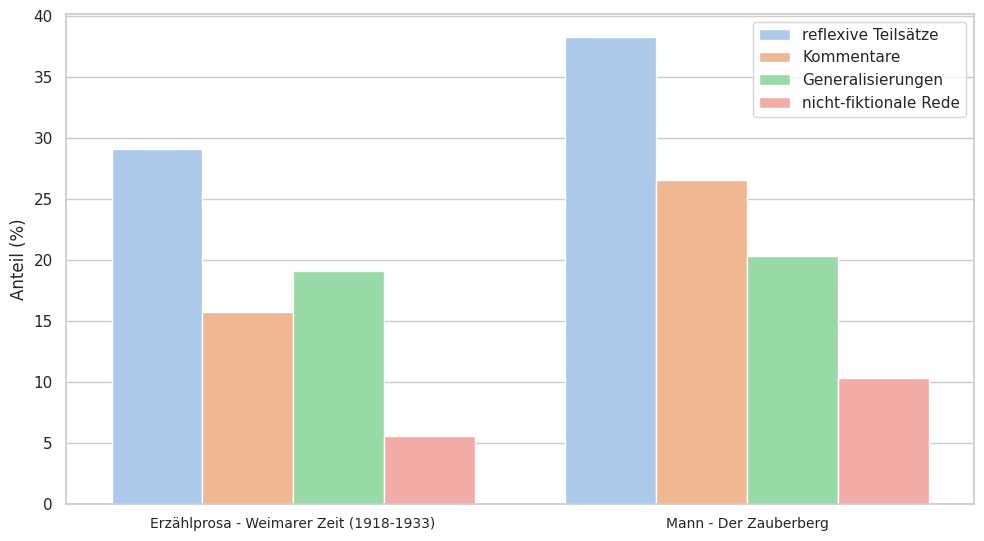

In [72]:
# Use Seaborn to create the grouped bar chart
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melted, x='filename', y='value', hue='attribute', palette='pastel')
plt.title('Grouped Bar Chart')
plt.xlabel('Filename')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.legend(title='')
plt.tight_layout()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.xaxis.set_tick_params(labelsize = 10)

# Get the handles and labels from the legend
handles, labels = ax.get_legend_handles_labels()

# Define custom legend labels
custom_labels = ['reflexive Teilsätze', 'Kommentare', 'Generalisierungen', 'nicht-fiktionale Rede']

plt.legend(handles=handles, labels=custom_labels, title="")

plt.title('')
plt.xlabel('')
plt.ylabel('Anteil (%)')
plt.savefig('plot1.png', dpi=1000)
#plt.gcf()
plt.show()

In [ ]:
#plt.savefig('plot1.png', dpi=400)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<Figure size 640x480 with 0 Axes>

# 12 kanonische Werke

In [67]:
# Drop columns 'filepath', 'exception', and 'setting'
#df_10_selected = df_10_selected.drop(['filepath', 'exception', 'setting'], axis=1)

# Set the 'filename' column as the index for better grouping
#df_10_selected.set_index('filename', inplace=True)

# Filter rows where the index is not 'Erzählprosa - Weimarer Zeit (1918-1933)'
df_10_selected_kanon = df_10_selected[df_10_selected.index != 'Erzählprosa - Weimarer Zeit (1918-1933)']

# Filter rows where the index is one of the specified values
authors_to_include = ["Mann", "Broch", "Alexanderplatz", "Flake", "Fallada", "Hesse", "Kafka", "Fabian", "Keun", "Musil", "Remarque", "Roth"]
df_10_selected_kanon = df_10_selected[df_10_selected.index.str.contains('|'.join(authors_to_include))]

df_10_selected_kanon = df_10_selected_kanon.sort_values('refl_clauses_perc', ascending=False)

# Display the resulting DataFrame
df_10_selected_kanon


,reflection_score_mean,refl_clauses_perc,gi_clauses_perc,nfr_clauses_perc,comment_clauses_perc,text_length_sents,text_length_clauses,text_length_tokens,reflective_passages_global,reflective_clauses,...,comment_gi_passages_global,comment_gi_clauses,comment_gi_tokens,comment_gi_nfr_passages_global,comment_gi_nfr_clauses,comment_gi_nfr_tokens,reflective_clauses_scored,reflective_clauses_new,exception,setting
filename,,,,,,,,,,,,,,,,,,,,,
Musil - Der Mann ohne Eigenschaften,0.483458,49.607914,34.236593,22.244435,36.907679,29220,77534,655181,13772,38463,...,955,3264,25738,654,2268,17939,29637.0,38463.0,,
Kafka - Das Schloss,0.465012,47.111291,13.708697,3.674235,38.7239,9368,19732,144658,2266,9296,...,62,121,1064,14,36,291,7718.0,9296.0,,
Flake - Die Stadt des Hirns,0.460626,43.814512,28.52411,16.988908,31.493607,14599,25964,308726,4104,11376,...,185,606,6701,108,342,3689,8586.0,11376.0,,
Hesse - Der Steppenwolf,0.448319,39.988932,24.073049,11.355838,30.105147,3560,9035,80868,1221,3613,...,42,122,1199,13,67,723,2772.0,3613.0,,
Mann - Der Zauberberg,0.437941,38.257712,20.358749,10.27916,26.552694,16566,41589,369340,6231,15911,...,213,568,4941,108,335,3054,11568.0,15911.0,,
Broch - Die Schlafwandler,0.440082,37.486115,21.991512,12.173517,27.33772,14567,35109,291145,4895,13161,...,270,702,4948,169,484,3299,9911.0,13161.0,,
Remarque - Im Westen nichts Neues,0.418905,34.732338,26.747997,8.020757,17.80772,6263,10984,79861,1460,3815,...,72,177,1120,36,89,601,2072.0,3815.0,,
Döblin - Berlin Alexanderplatz,0.41418,33.654645,23.997256,6.444276,17.166685,14585,27699,218870,4065,9322,...,185,450,3080,79,198,1332,5106.0,9322.0,,
Roth - Radetzkymarsch,0.390507,28.135792,21.510097,2.850454,9.452736,9295,17085,148345,1844,4807,...,44,69,473,22,35,206,1735.0,4807.0,,


In [68]:
# Melt the DataFrame to prepare for grouped bar chart
melted_cols = ['refl_clauses_perc', 'comment_clauses_perc', 'gi_clauses_perc', 'nfr_clauses_perc']
df_melted_kanon = pd.melt(df_10_selected_kanon[melted_cols].reset_index(), id_vars='filename', var_name='attribute', value_name='value')
df_melted_kanon

,filename,attribute,value
0,Musil - Der Mann ohne Eigenschaften,refl_clauses_perc,49.607914
1,Kafka - Das Schloss,refl_clauses_perc,47.111291
2,Flake - Die Stadt des Hirns,refl_clauses_perc,43.814512
3,Hesse - Der Steppenwolf,refl_clauses_perc,39.988932
4,Mann - Der Zauberberg,refl_clauses_perc,38.257712
5,Broch - Die Schlafwandler,refl_clauses_perc,37.486115
6,Remarque - Im Westen nichts Neues,refl_clauses_perc,34.732338
7,Döblin - Berlin Alexanderplatz,refl_clauses_perc,33.654645
8,Roth - Radetzkymarsch,refl_clauses_perc,28.135792
9,Mann - Der Untertan,refl_clauses_perc,23.827601


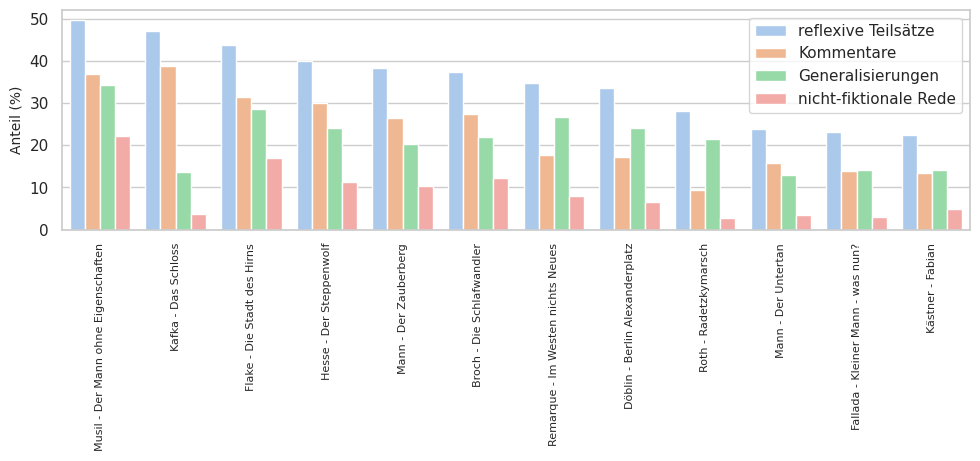

In [71]:
# Use Seaborn to create the grouped bar chart
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melted_kanon, x='filename', y='value', hue='attribute', palette='pastel')
plt.title('Grouped Bar Chart')
plt.xlabel('Filename')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.legend(title='Attributes')
plt.tight_layout()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.xaxis.set_tick_params(labelsize = 8)

# Get the handles and labels from the legend
handles, labels = ax.get_legend_handles_labels()

# Define custom legend labels
#custom_labels = ['reflexive Teilsätze', 'Kommentare', 'Generalisierungen', 'nicht-fiktionale Rede', "nicht-fiktionale Rede & Generalisierung"]
custom_labels = ['reflexive Teilsätze', 'Kommentare', 'Generalisierungen', 'nicht-fiktionale Rede']

plt.legend(handles=handles, labels=custom_labels, title="")

plt.title('')
plt.xlabel('')
plt.ylabel('Anteil (%)')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
for ax in plt.gcf().axes:
    l = ax.get_ylabel()
    ax.set_ylabel(l, fontsize=10)
plt.savefig('plot2.png', dpi=1000)
plt.show()


# Topic Modelling

In [ ]:
# ausgewählte Romane importieren

import os
import json
results = {}

# Specify the path you want to loop through
path = '/content/drive/MyDrive/zauber_results/'
#path = '/content/drive/MyDrive/zauber_results_weimar/'

# Loop through files and directories in the specified path
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith("json") and "passages" in file:
          file_path = os.path.join(root, file)
          print("File:", file_path)
          json1_file = open(file_path)
          json1_str = json1_file.read()
          json1_data = json.loads(json1_str)
          key = file_path.split("/")[-1:]
          key = ''.join(key)
          results[key] = json1_data
#results['Mann_Der_Zauberberg_clean_result_passages1693872478.json']["reflective_clauses"]

File: /content/drive/MyDrive/zauber_results/Musil_Der_Mann_ohne_Eigenschaften_clean_result_passages1693872478.json
File: /content/drive/MyDrive/zauber_results/Flake_Die_Stadt_des_Hirns_clean_result_passages1693872478.json
File: /content/drive/MyDrive/zauber_results/Hans_Fallada_Kleiner_Mann_clean_result_passages1693872478.json
File: /content/drive/MyDrive/zauber_results/Kästner_Fabian_clean_result_passages1693872478.json
File: /content/drive/MyDrive/zauber_results/Broch_Die_Schlafwandler_clean_result_passages1693872478.json
File: /content/drive/MyDrive/zauber_results/Mann_Der_Zauberberg_clean_result_passages1693872478.json
File: /content/drive/MyDrive/zauber_results/Baum_Menschen-im-Hotel_clean_result_passages1693872478.json
File: /content/drive/MyDrive/zauber_results/Glaeser_Jahrgang-1902_clean_result_passages1693872478.json
File: /content/drive/MyDrive/zauber_results/Remarque_Im_Westen_nichts_Neues_clean_result_passages1693872478.json
File: /content/drive/MyDrive/zauber_results/Wass

In [ ]:
#exlude bestseller
authors_to_include = ["Mann", "Broch", "Alexanderplatz", "Flake", "Fallada", "Hesse", "Kafka", "Fabian", "Keun", "Musil", "Remarque", "Roth"]
results = {key: value for key, value in results.items() if any(author in key for author in authors_to_include)}

# Display the filtered dictionary
len(results)

13

In [ ]:
# Weimar-Prosa importieren

import os
import json
results_weimar = {}

# Specify the path you want to loop through
#path = '/content/drive/MyDrive/zauber_results/'
path = '/content/drive/MyDrive/zauber_results_weimar/'

# Loop through files and directories in the specified path
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith("json") and "passages" in file:

          file_path = os.path.join(root, file)
          print("File:", file_path)
          json1_file = open(file_path)
          json1_str = json1_file.read()
          json1_data = json.loads(json1_str)
          key = file_path.split("/")[-1:]
          key = ''.join(key)
          results_weimar[key] = json1_data
#results['Mann_Der_Zauberberg_clean_result_passages1693872478.json']["reflective_clauses"]

File: /content/drive/MyDrive/zauber_results_weimar/None_Allerseelen_result_passages1694020683.json
File: /content/drive/MyDrive/zauber_results_weimar/Lienhard_Jugendjahre_result_passages1694020683.json
File: /content/drive/MyDrive/zauber_results_weimar/None_Revolution in Montevideo_result_passages1694020683.json
File: /content/drive/MyDrive/zauber_results_weimar/Wassermann_Oberlins drei Stufen und Sturreganz_result_passages1694020683.json
File: /content/drive/MyDrive/zauber_results_weimar/Federer_Der Fürchtemacher_result_passages1694020683.json
File: /content/drive/MyDrive/zauber_results_weimar/Lichtenstein_Cafe Klößchen_result_passages1694020683.json
File: /content/drive/MyDrive/zauber_results_weimar/None_Der Onkel_result_passages1694020683.json
File: /content/drive/MyDrive/zauber_results_weimar/None_Blumentag in Nordfrankreich_result_passages1694020683.json
File: /content/drive/MyDrive/zauber_results_weimar/Mühsam_Sacco und Vanzetti_result_passages1694020683.json
File: /content/dr

In [ ]:
results_weimar["Schraut_Allan Garps letzte Stunde_result_passages1694020683.json"]

{'nfr_clauses': ['Lieber Gott, Nummerschilder lassen sich fälschen',
  'weiß auch',
  'denn niemand kann zween Herren dienen',
  'zahlt stets zuviel',
  'kann man nie wissen',
  'wird leicht ein Sonderling',
  'Im Mai fallen keine Blätter',
  'Im nördlichen Teile der Provinz Brandenburg gibt es ein Gebiet',
  'daß aus Seen, Sümpfen, uralten Wäldern und unfruchtbarer Heide besteht',
  'Der Mensch ist zu vielseitig',
  'Selbst die schlauesten Verbrecher begehen grobe Fehler',
  'jedoch selbst »Wahrheit« ist ein relativer Begriff',
  'Wer sofort zahlt',
  'für gewöhnlich werden nur Menschen durch den Schmutz gezogen',
  'daß die Nordweststämme Indiens ursprünglich Arier gewesen',
  'Die Großstadt bietet gerade in ihren Randortschaften für verbrecherische Elemente das beste Betätigungsfeld',
  'und Benzlimousinen gibt es übergenug',
  'Wer das neue Villenviertel von Zehlendorf kennt'],
 'reflective_clauses': ['Morwyn muß mich um ungeheure Summen betrogen haben',
  'Das mag genügen',
  'daß

In [ ]:
print(len(results_weimar))

586


In [ ]:
#Dopplungen vermeiden
works_to_check = ["Zauberberg", "Der Mann ohne Eigenschaften", "Das kunstseidene Mädchen", "Die Stadt des Hirns", "Der Steppenwolf", "Die Schlafwandler", "Im Westen nichts Neues", "Berlin Alexanderplatz", "Radetzkymarsch", "Der Untertan", "Kleiner Mann", "Fabian"]
results_doppelt = {key: value for key, value in results_weimar.items() if any(work in key for work in works_to_check)}

# Display the filtered dictionary
#len(results_doppelt)
#results_doppelt
results_ohne_dopplungen = {k:v for k,v in results_weimar.items() if k not in results_doppelt}
print(len(results_weimar))
print(len(results_ohne_dopplungen))

586
585


In [ ]:
## hinzufügen ausgewählte Romane zu Weimar_Korpus
results_final = results | results_ohne_dopplungen
len(results_final)

598

In [ ]:
results = results_final

In [ ]:
# create df mit Passagen

import pandas as pd


# Create empty lists to store the filename and content data
filenames = []
contents = []

# Iterate through the dictionary items
for filename, text in results.items():
    # Split the text into clauses using ";"
    clauses = results[filename]["reflective_clauses"]

    # Append each clause to the lists along with the corresponding filename
    for clause in clauses:
        filenames.append(filename)
        contents.append(clause.strip())  # Remove leading/trailing spaces

# Create a DataFrame from the lists
df_texte_sentences = pd.DataFrame({"filename": filenames, "content": contents})

# Display the resulting DataFrame
print(df_texte_sentences)

                                                 filename  \
0       Musil_Der_Mann_ohne_Eigenschaften_clean_result...   
1       Musil_Der_Mann_ohne_Eigenschaften_clean_result...   
2       Musil_Der_Mann_ohne_Eigenschaften_clean_result...   
3       Musil_Der_Mann_ohne_Eigenschaften_clean_result...   
4       Musil_Der_Mann_ohne_Eigenschaften_clean_result...   
...                                                   ...   
944304  Ernst_Die verdoppelten Skudi_result_passages16...   
944305  Ernst_Die verdoppelten Skudi_result_passages16...   
944306  Ernst_Die verdoppelten Skudi_result_passages16...   
944307  Ernst_Die verdoppelten Skudi_result_passages16...   
944308  Ernst_Die verdoppelten Skudi_result_passages16...   

                                                  content  
0                                             lieber Papa  
1                               zu den wenigen zu gehören  
2                             daß heute nichts mehr ernst  
3                    recht 

In [ ]:
# BERT Topic https://maartengr.github.io/BERTopic/index.html#quick-start
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 25.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.5 MB/s eta 0:00:00
  Preparing metadata (set

In [ ]:
# preprocessing
documents = df_texte_sentences["content"].tolist()
# Replace "- \n" with an empty string and "\n" with a space
documents = [text.replace("- \n", "").replace("\n", " ") for text in documents]
print(documents[1])



zu den wenigen zu gehören


In [ ]:
# Pre-compute embeddings
#!pip install protobuf
! pip install sentence_transformers
from sentence_transformers import SentenceTransformer
#sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Load model directly
#from transformers import AutoTokenizer, AutoModel

#tokenizer = AutoTokenizer.from_pretrained("T-Systems-onsite/cross-en-de-roberta-sentence-transformer")
#sentence_model = AutoModel.from_pretrained("T-Systems-onsite/cross-en-de-roberta-sentence-transformer")
sentence_model = SentenceTransformer("T-Systems-onsite/cross-en-de-roberta-sentence-transformer")
german_text = "Das ist ein Beispieltext."

embeddings = sentence_model.encode(documents, show_progress_bar=True)

Batches:   0%|          | 0/29510 [00:00<?, ?it/s]

In [ ]:
import pickle

# Save variables to a file
zauberberg_dh_vars = {"documents": documents, "df_texte_sentences": df_texte_sentences, "embeddings": embeddings}
#with open("/content/drive/MyDrive/zauber_results/zauberberg_dh_vars.pkl'", "wb") as file:
#    pickle.dump(zauberberg_dh_vars, file)
with open("zauberberg_dh_vars.pkl", "wb") as file:
    pickle.dump(zauberberg_dh_vars, file)

In [ ]:
# read file from colab directly
import pickle

# Load the dictionary from the pickle file
with open('/content/zauberberg_dh_vars.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

# Unpack the dictionary items into separate variables
for key, value in loaded_data.items():
    globals()[key] = value

In [ ]:
# generate list of persons to exclude as stopwords
!pip install -U spacy
!python -m spacy download de_core_news_sm
import spacy
nlp=spacy.load('de_core_news_sm')
nlp.max_length = 4030000

# Function to extract persons from a text
def extract_persons(text):
    doc = nlp(text)
    persons = [ent.text for ent in doc.ents if ent.label_ == "PER"]
    return persons

# Extract persons from each document
all_persons = []
for document in documents:
    persons = extract_persons(document)
    all_persons.extend(persons)

# Print the list of persons
print(all_persons)

2023-09-12 16:43:01.943957: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-12 16:43:03.267515: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 29.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
['Versammlungen', 'Keines', 'Mannes von Welt', 'Gefühls', 'Rachel von Arnheim', 'Teufel', 'Siegmund', 'paßte', 'Lindner', 'Gerda', 'Moosbrugger', 'Mann', 'Zuwiderlaufendes', 'Gutmütige Kraft', 'Bonadea', 'Gott', 'Walter', 'Goethe', 'Napoleon', 'Gefühls', 'Meingast', 'Leonas', 'Beispielen', 'Stößt', 'Ulrich', 'Clarisse', 'Ernst', 'Ulrich', 'Du', 'Wovon', 'Agathe', 'Abscheus', 'Ma

In [ ]:
import pickle

# Save variables to a file
zauberberg_dh_all_persons = {"all_persons": all_persons}
with open("/content/drive/MyDrive/zauber_results/zauberberg_dh_all_persons.pkl", "wb") as file:
    pickle.dump(zauberberg_dh_all_persons, file)

In [ ]:
# read file from colab directly
import pickle

# Load the dictionary from the pickle file
with open('/content/zauberberg_dh_all_persons_new.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

# Unpack the dictionary items into separate variables
for key, value in loaded_data.items():
    globals()[key] = value

In [ ]:
all_persons_low = [x.lower() for x in all_persons]

In [ ]:
add_persons = ["castorp", "hans", "pribislav", "hippe", "castorps", "naphta", "settembrini", "joachim", "behrens", "peperkorn", 'tienappel', 'clawdia', 'chauchat']

In [ ]:
# Train our topic model using our pre-trained sentence-transformers embeddings
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
german_stop_words = stopwords.words('german') + all_persons_low + add_persons# Figurennamen ausschließen
#vectorizer_model = CountVectorizer(stop_words = german_stop_words) # remove stopwords after calculation of embeddings
vectorizer_model = CountVectorizer(stop_words = german_stop_words, min_df=10) # remove stopwords after calculation of embeddings



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Cuml

In [ ]:
!pip install numba==0.56.4

In [ ]:
!pip install pynndescent==0.5.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55490 sha256=23468615936adf836d93dae85148c986c84a95b2991f4a01a95b46a3d5af1b94
  Stored in directory: /root/.cache/pip/wheels/f8/5c/b4/a06301605095861524c1c7268a0d445b3a4c50292ce3bec24c
Successfully built pynndescent
  Attempting uninstall: pynndescent
    Found existing installation: pynndescent 0.5.10
    Uninstalling pynndescent-0.5.10:
      Successfully uninstalled pynndescent-0.5.10


In [ ]:
!pip install bertopic
!pip install cudf-cu11 dask-cudf-cu11 --extra-index-url=https://pypi.nvidia.com
!pip install cuml-cu11 --extra-index-url=https://pypi.nvidia.com
!pip install cugraph-cu11 --extra-index-url=https://pypi.nvidia.com
!pip install --upgrade cupy-cuda11x -f https://pip.cupy.dev/aarch64

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.6/499.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.6/81.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 582.4/582.4 kB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.0/122.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.7/214.7 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.2/198.2 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 555.6/555.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 85.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.3 MB/s eta 0:00:00
Looking in links: https://pip.cupy.dev/aarch64


In [ ]:
#cuml

from bertopic import BERTopic
from hdbscan import HDBSCAN
#from bertopic.representation import KeyBERTInspired
from bertopic.representation import MaximalMarginalRelevance
#from umap import UMAP
from cuml.cluster import HDBSCAN

#umap_model = UMAP(random_state=42)
hdbscan_model = HDBSCAN(min_samples=10, min_cluster_size=1000, prediction_data=True)

# Create your representation model - #Diversify topic representation
representation_model = MaximalMarginalRelevance(diversity=0.3)


topic_model = BERTopic(hdbscan_model=hdbscan_model, vectorizer_model=vectorizer_model, representation_model=representation_model, language = "german")
#topic_model = BERTopic(vectorizer_model=vectorizer_model, representation_model=representation_model, language = "german", nr_topics=50)

topics, probs = topic_model.fit_transform(documents, embeddings)

AttributeError: ignored

In [ ]:
import pickle

# Save variables to a file
zauberberg_dh_vars = {"topic_model": topic_model, "topics": topics, "probs": probs}
with open("/content/drive/MyDrive/zauber_results/zauberberg_dh_bert_model_topics_auto_nouns.pkl", "wb") as file:
    pickle.dump(zauberberg_dh_vars, file)
with open("zauberberg_dh_bert_model_min_cluster_3000.pkl", "wb") as file:
    pickle.dump(zauberberg_dh_vars, file)

In [ ]:
topic_model.save("/content/drive/MyDrive/zauber_results/zauberberg_dh_bert_model_topics_auto_nouns", serialization="pytorch", save_ctfidf=True)

In [ ]:
!gdown --id 1ZqUyMmxxnRHZRllvAkYE2TuqqkQ6dpEK

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZqUyMmxxnRHZRllvAkYE2TuqqkQ6dpEK
To: /content/zauberberg_dh_bert_model_min_cluster_1000.pkl
100% 11.4G/11.4G [01:18<00:00, 146MB/s]


In [ ]:
# Load from directory
from bertopic import BERTopic
topic_model = BERTopic.load("/content/drive/MyDrive/zauber_results/zauberberg_dh_bert_model_min_cluster_1000")

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,447908,-1_mehr_wäre_menschen_hätte,"[mehr, wäre, menschen, hätte, ganz, konnte, im...",NaN
1,0,18111,0_wort_reden_gesagt_sprach,"[wort, reden, gesagt, sprach, erzählen, sprich...",NaN
2,1,14696,1_tag_abend_täglich_stunde,"[tag, abend, täglich, stunde, morgen, tage, wo...",NaN
3,2,11457,2_küssen_geliebten_liebhaber_romantik,"[küssen, geliebten, liebhaber, romantik, zärtl...",NaN
4,3,8658,3_glück_zufrieden_freuen_trost,"[glück, zufrieden, freuen, trost, vergnügen, t...",NaN
...,...,...,...,...,...
183,182,1039,182_gehört_gehörte_gehören_tat,"[gehört, gehörte, gehören, tat, taten, getan, ...",NaN
184,183,1038,183_beten_gebet_gebeten_gebettet,"[beten, gebet, gebeten, gebettet, täglich, kni...",NaN
185,184,1022,184_moralische_moralischen_sittliche_sittlichen,"[moralische, moralischen, sittliche, sittliche...",NaN
186,185,1011,185_sonderbar_merkwürdige_unheimlich_eigentümlich,"[sonderbar, merkwürdige, unheimlich, eigentüml...",NaN


In [ ]:
# zurückmappen auf die einzelnen Texte
#docs = data["data"]
import pandas as pd
#df_topics = pd.DataFrame({'topic': topics_redu, 'probs': probs_redu, 'document': documents, "filename": df_texte_sentences["filename"]})
df_topics = pd.DataFrame({'topic': topics, 'probs': probs, 'document': documents, "filename": df_texte_sentences["filename"]})


df_topics.head()

,topic,probs,document,filename
0,-1,0.0,lieber Papa,Musil_Der_Mann_ohne_Eigenschaften_clean_result...
1,-1,0.0,zu den wenigen zu gehören,Musil_Der_Mann_ohne_Eigenschaften_clean_result...
2,-1,0.0,daß heute nichts mehr ernst,Musil_Der_Mann_ohne_Eigenschaften_clean_result...
3,1,1.0,recht eigentlich das sprechende Tier,Musil_Der_Mann_ohne_Eigenschaften_clean_result...
4,-1,0.0,aber damit wäre freilich die Frage vorderhand ...,Musil_Der_Mann_ohne_Eigenschaften_clean_result...


In [ ]:

# Filter out rows with topic '-1'
df = df_topics[df_topics['topic'] != int('-1')]

# Group by 'filename' and count topic occurrences
grouped = df.groupby(['filename', 'topic']).size().reset_index(name='count')

# Sort by count in descending order
grouped.sort_values(by=['filename', 'count'], ascending=[True, False], inplace=True)

# Get the top topic for each filename
#top_topics = grouped.groupby('filename').first().reset_index()
top_topics = grouped.groupby('filename').head(5)

top_topics

,filename,topic,count
4,Adolph_Am 1. Mai_result_passages1694075864.json,5,45
0,Adolph_Am 1. Mai_result_passages1694075864.json,0,18
83,Adolph_Am 1. Mai_result_passages1694075864.json,276,10
33,Adolph_Am 1. Mai_result_passages1694075864.json,48,7
25,Adolph_Am 1. Mai_result_passages1694075864.json,34,5
...,...,...,...
81014,Zweig_Sternstunden der Menschheit_result_passa...,0,297
81037,Zweig_Sternstunden der Menschheit_result_passa...,23,95
81015,Zweig_Sternstunden der Menschheit_result_passa...,1,56
81024,Zweig_Sternstunden der Menschheit_result_passa...,10,56


In [ ]:
# Convert the 'topic' column to a string
top_topics['topic'] = top_topics['topic'].astype(str)

# Merge topics and counts into a single column
top_topics['topics_with_counts'] = top_topics['topic'] + " [" + top_topics['count'].astype(str) + "]"

# Group by 'filename' and aggregate topics into a comma-separated string
result_df = top_topics.groupby('filename')['topics_with_counts'].apply(lambda x: ', '.join(x)).reset_index()


result_df

,filename,topics_with_counts
0,Adolph_Am 1. Mai_result_passages1694075864.json,"5 [45], 0 [18], 276 [10], 48 [7], 34 [5]"
1,Adolph_Von früher und heute_result_passages16...,"0 [80], 5 [74], 1 [26], 3 [16], 8 [15]"
2,Altenberg_Bei Buffalo Bill_result_passages1694...,0 [1]
3,Altenberg_Locale Chronik_result_passages169407...,"1 [3], 0 [2], 3 [2], 4 [2], 22 [2]"
4,Altenberg_Verzauberte Prinzessin_result_passag...,"0 [1], 2 [1], 153 [1], 224 [1]"
...,...,...
587,Zürcher-Siebel_Das Freudengärtlein_result_pa...,"0 [52], 37 [28], 15 [21], 9 [19], 63 [18]"
588,Zweig_Amok_result_passages1694020683.json,"0 [243], 3 [59], 1 [48], 4 [45], 2 [27]"
589,Zweig_Die unsichtbare Sammlung_result_passages...,"0 [97], 39 [29], 33 [21], 130 [16], 4 [13]"
590,Zweig_Marceline Desbordes-Valmore_result_passa...,"0 [344], 3 [175], 46 [114], 1 [88], 32 [79]"


# Visualisierung

In [ ]:
original_df = topic_model.get_topic_info()
original_df

,Topic,Count,Name,Representation,Representative_Docs
0,-1,447908,-1_mehr_wäre_menschen_hätte,"[mehr, wäre, menschen, hätte, ganz, konnte, im...",NaN
1,0,18111,0_wort_reden_gesagt_sprach,"[wort, reden, gesagt, sprach, erzählen, sprich...",NaN
2,1,14696,1_tag_abend_täglich_stunde,"[tag, abend, täglich, stunde, morgen, tage, wo...",NaN
3,2,11457,2_küssen_geliebten_liebhaber_romantik,"[küssen, geliebten, liebhaber, romantik, zärtl...",NaN
4,3,8658,3_glück_zufrieden_freuen_trost,"[glück, zufrieden, freuen, trost, vergnügen, t...",NaN
...,...,...,...,...,...
183,182,1039,182_gehört_gehörte_gehören_tat,"[gehört, gehörte, gehören, tat, taten, getan, ...",NaN
184,183,1038,183_beten_gebet_gebeten_gebettet,"[beten, gebet, gebeten, gebettet, täglich, kni...",NaN
185,184,1022,184_moralische_moralischen_sittliche_sittlichen,"[moralische, moralischen, sittliche, sittliche...",NaN
186,185,1011,185_sonderbar_merkwürdige_unheimlich_eigentümlich,"[sonderbar, merkwürdige, unheimlich, eigentüml...",NaN


In [ ]:
topic_model.visualize_barchart(top_n_topics = 16, n_words = 10)

In [ ]:
fig=plt.figure()
fig.savefig("Abbildung4.png", format="PNG", bbox_inches='tight', dpi=1400)

<Figure size 640x480 with 0 Axes>

In [ ]:
topic_model.visualize_heatmap(n_clusters = 10)

In [ ]:
# Rückbeziehen auf einzelne Texte

In [ ]:
classes = [df_texte_sentences["filename"][i] for i in df_texte_sentences.index]

In [ ]:
topics_per_class = topic_model.topics_per_class(documents, classes=classes)

In [ ]:
topics_per_class

,Topic,Words,Frequency,Class
0,-1,"mi, interesse, könnt, halt, do",1120,Thoma_Münchnerinnen_result_passages1694075864...
1,0,"reden, wort, redensarten, sprach, wortes",69,Thoma_Münchnerinnen_result_passages1694075864...
2,1,"tag, aufgedrängt, rauf, müd, herrlichsten",22,Thoma_Münchnerinnen_result_passages1694075864...
3,2,"siegt, sorgt, unzeit, überwachen, möglichkeit",23,Thoma_Münchnerinnen_result_passages1694075864...
4,3,"behagen, freuen, glück, nachging, freuten",27,Thoma_Münchnerinnen_result_passages1694075864...
...,...,...,...,...
63118,181,"schreit, schrien, laut, brüllen, immerzu",2,Zweig_Die unsichtbare Sammlung_result_passages...
63119,182,"schafft, gehört, gehörte, gehören, tat",1,Zweig_Die unsichtbare Sammlung_result_passages...
63120,183,"beten, gebet, gläubigen, sekunde, wenig",2,Zweig_Die unsichtbare Sammlung_result_passages...
63121,185,"ordnet, unbegreiflich, sonderbar, ganz, menschen",2,Zweig_Die unsichtbare Sammlung_result_passages...


In [ ]:
topics_zauberberg = topics_per_class[topics_per_class['Class'] == 'Mann_Der_Zauberberg_clean_result_passages1693872478.json']
topics_zauberberg

,Topic,Words,Frequency,Class
51210,-1,"krankheit, hätte, überhaupt, übrigens, ganz",7947,Mann_Der_Zauberberg_clean_result_passages16938...
51211,0,"wort, reden, erzählen, sprach, nous",369,Mann_Der_Zauberberg_clean_result_passages16938...
51212,1,"tag, stunde, täglich, tage, abend",186,Mann_Der_Zauberberg_clean_result_passages16938...
51213,2,"est, menschenliebe, romantik, liebhaber, küssen",139,Mann_Der_Zauberberg_clean_result_passages16938...
51214,3,"glück, vergnügen, genugtuung, trost, freuen",134,Mann_Der_Zauberberg_clean_result_passages16938...
...,...,...,...,...
51393,182,"gehört, tat, zwange, mannsbild, zwischendurch",19,Mann_Der_Zauberberg_clean_result_passages16938...
51394,183,"gebet, beten, verbringt, kranker, geachtet",8,Mann_Der_Zauberberg_clean_result_passages16938...
51395,184,"moralischen, moralische, nous, dans, sittliche",39,Mann_Der_Zauberberg_clean_result_passages16938...
51396,185,"sonderbar, eigentümlich, merkwürdige, bewandtn...",27,Mann_Der_Zauberberg_clean_result_passages16938...


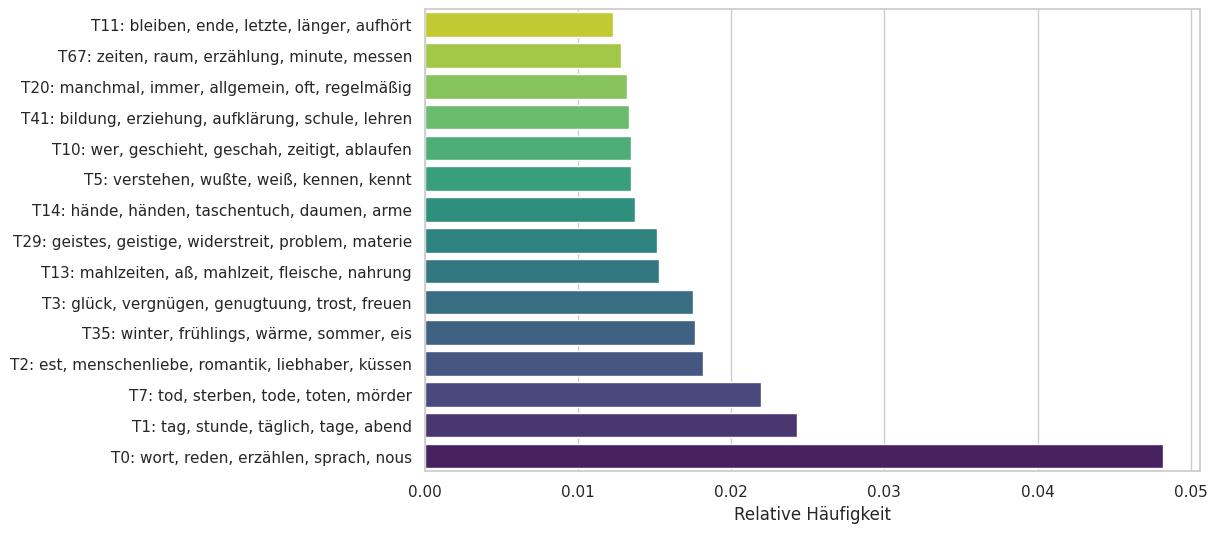

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Filter rows for the desired class and exclude topic -1
desired_class = 'Mann_Der_Zauberberg_clean_result_passages1693872478.json'
filtered_df = topics_zauberberg[(topics_zauberberg['Class'] == desired_class) & (topics_zauberberg['Topic'] != -1)]

# Step 2: Calculate the relative frequency of each topic
total_frequency = filtered_df['Frequency'].sum()
filtered_df['Relative_Frequency'] = filtered_df['Frequency'] / total_frequency
filtered_df = filtered_df.sort_values(by='Frequency', ascending=False).head(15)

# Step 3: Create labels for the topics with all 5 words from "Words" column
filtered_df['Topic_Label'] = 'T' + (filtered_df['Topic']).astype(str) + ': ' + \
    filtered_df['Words'].str.split(', ').str[:5].str.join(', ')

# Step 4: Visualize the data using Seaborn with grid and axis customization
fig=plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Add a grid
sns.barplot(x='Relative_Frequency', y='Topic_Label', data=filtered_df, palette='viridis')
plt.xlabel('Relative Häufigkeit')
plt.ylabel('')  # Remove y-axis label
plt.title('')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most frequent topic at the top

fig.show()
fig.savefig("Abbildung5.png", format="PNG", bbox_inches='tight', dpi=1400)

plt.show()


In [ ]:
### get similar docs to Zauberberg

topics_per_class = topics_per_class[topics_per_class["Topic"] != -1]
# Group by 'Class' and 'Topic,' then calculate the sum of 'Frequency' for each group
grouped = topics_per_class.groupby(['Class', 'Topic'])['Frequency'].sum().reset_index()

# Calculate the sum of 'Frequency' for each class
class_totals = topics_per_class.groupby('Class')['Frequency'].sum().reset_index()

# Merge the grouped data with class totals
result = pd.merge(grouped, class_totals, on='Class', suffixes=('', '_Total'))

# Calculate the relative frequency by dividing 'Frequency' by 'Frequency_Total'
result['Relative_Frequency'] = result['Frequency'] / result['Frequency_Total']

# Drop the 'Frequency_Total' column if not needed in the final output
result = result.drop('Frequency_Total', axis=1)

# Display the result
result


,Class,Topic,Frequency,Relative_Frequency
0,Adolph_Am 1. Mai_result_passages1694075864.json,0,2,0.010526
1,Adolph_Am 1. Mai_result_passages1694075864.json,1,2,0.010526
2,Adolph_Am 1. Mai_result_passages1694075864.json,3,3,0.015789
3,Adolph_Am 1. Mai_result_passages1694075864.json,4,1,0.005263
4,Adolph_Am 1. Mai_result_passages1694075864.json,5,2,0.010526
...,...,...,...,...
62528,Zweig_Sternstunden der Menschheit_result_passa...,182,1,0.000416
62529,Zweig_Sternstunden der Menschheit_result_passa...,183,7,0.002912
62530,Zweig_Sternstunden der Menschheit_result_passa...,184,2,0.000832
62531,Zweig_Sternstunden der Menschheit_result_passa...,185,2,0.000832


In [ ]:
### top10 topics per document

# Sort the DataFrame by 'Class' and 'Relative_Frequency' in descending order
sorted_df = result.sort_values(by=['Class', 'Relative_Frequency'], ascending=[True, False])

# Define a function to extract the top n topics for each class
def extract_top_n_topics(group, n=10):
    return group.head(n)['Topic'].tolist()

# Group by 'Class' and apply the function to extract the top 15 topics
dominant_topics_df = sorted_df.groupby('Class').apply(extract_top_n_topics).reset_index(name='dominant_topics')


# Display the new DataFrame
dominant_topics_df




,Class,dominant_topics
0,Adolph_Am 1. Mai_result_passages1694075864.json,"[6, 55, 11, 14, 38, 22, 43, 46, 109, 3]"
1,Adolph_Von früher und heute_result_passages16...,"[6, 0, 1, 4, 27, 2, 13, 17, 7, 18]"
2,Altenberg_Bei Buffalo Bill_result_passages1694...,[35]
3,Altenberg_Locale Chronik_result_passages169407...,"[0, 96, 1, 2, 4, 29, 34, 81, 82, 5]"
4,Altenberg_Verzauberte Prinzessin_result_passag...,"[0, 2, 4, 145]"
...,...,...
587,Zürcher-Siebel_Das Freudengärtlein_result_pa...,"[17, 47, 8, 3, 6, 12, 13, 14, 23, 36]"
588,Zweig_Amok_result_passages1694020683.json,"[0, 2, 1, 5, 3, 24, 4, 22, 86, 17]"
589,Zweig_Die unsichtbare Sammlung_result_passages...,"[1, 54, 32, 0, 109, 3, 14, 12, 52, 158]"
590,Zweig_Marceline Desbordes-Valmore_result_passa...,"[2, 0, 74, 1, 3, 51, 16, 135, 7, 22]"


In [ ]:
# search for similar texts


In [ ]:
zauber_tops = dominant_topics_df.loc[271,"dominant_topics"]
zauber_tops

[0, 1, 7, 2, 35, 3, 13, 29, 14, 5]

In [ ]:
dominant_topics_df["identical_tops_with_zauberberg"] = [
    [topic for topic in topics if topic in zauber_tops]
    for topics in dominant_topics_df["dominant_topics"]]

# Calculate the number of common topics for each row
dominant_topics_df["number_of_common_tops"] = dominant_topics_df["identical_tops_with_zauberberg"].apply(len)

# Sort the DataFrame by the number of common topics in ascending order
sorted_df = dominant_topics_df.sort_values(by='number_of_common_tops', ascending=False)
sorted_df


,Class,dominant_topics,identical_tops_with_zauberberg,number_of_common_tops
271,Mann_Der_Zauberberg_clean_result_passages16938...,"[0, 1, 7, 2, 35, 3, 13, 29, 14, 5]","[0, 1, 7, 2, 35, 3, 13, 29, 14, 5]",10
357,None_Der heilige Palast_result_passages1694075...,"[1, 9, 14, 21, 2, 7, 0, 4, 3, 13]","[1, 14, 2, 7, 0, 3, 13]",7
57,Brust_Spiele_result_passages1694075864.json,"[0, 2, 1, 8, 7, 13, 21, 29, 3, 15]","[0, 2, 1, 7, 13, 29, 3]",7
214,Hesse_Steppenwolf_clean_result_passages1693907...,"[2, 7, 1, 0, 18, 3, 29, 5, 11, 4]","[2, 7, 1, 0, 3, 29, 5]",7
578,Weiß_Mensch gegen Mensch_result_passages169407...,"[1, 2, 0, 3, 7, 14, 13, 101, 83, 18]","[1, 2, 0, 3, 7, 14, 13]",7
...,...,...,...,...
384,None_Es war am Morgen eines regnerischen Herbs...,[173],[],0
392,None_Hans und der Großvater_result_passages169...,"[44, 45, 92, 159]",[],0
229,Kafka_Die Brücke_result_passages1694075864.json,"[15, 19]",[],0
344,None_Der Onkel_result_passages1694020683.json,"[30, 81, 103, 137, 168]",[],0


In [ ]:
!pip install rbo
import rbo

# Filter rows where the number of dominant topics is at least 15
#dominant_topics_df = dominant_topics_df[dominant_topics_df['dominant_topics'].apply(len) >= 15]

dominant_topics_df["similarity_score"] = dominant_topics_df["identical_tops_with_zauberberg"].apply(
    lambda x: rbo.RankingSimilarity(zauber_tops, x).rbo())
sorted_df = dominant_topics_df.sort_values(by=['number_of_common_tops','similarity_score'], ascending=False)
sorted_df

,Class,dominant_topics,identical_tops_with_zauberberg,number_of_common_tops,similarity_score
271,Mann_Der_Zauberberg_clean_result_passages16938...,"[0, 1, 7, 2, 35, 3, 13, 29, 14, 5]","[0, 1, 7, 2, 35, 3, 13, 29, 14, 5]",10,1.000000
219,Hofmannsthal_Andreas oder die Vereinigten_resu...,"[0, 2, 1, 7, 29, 4, 28, 3, 5, 22]","[0, 2, 1, 7, 29, 3, 5]",7,0.787755
57,Brust_Spiele_result_passages1694075864.json,"[0, 2, 1, 8, 7, 13, 21, 29, 3, 15]","[0, 2, 1, 7, 13, 29, 3]",7,0.784354
577,Weiß_Georg Letham_result_passages1694075864.json,"[1, 0, 15, 2, 3, 13, 36, 11, 7, 5]","[1, 0, 2, 3, 13, 7, 5]",7,0.672449
578,Weiß_Mensch gegen Mensch_result_passages169407...,"[1, 2, 0, 3, 7, 14, 13, 101, 83, 18]","[1, 2, 0, 3, 7, 14, 13]",7,0.629592
...,...,...,...,...,...
392,None_Hans und der Großvater_result_passages169...,"[44, 45, 92, 159]",[],0,0.000000
403,None_Löwe und Tiger_result_passages1694075864...,[152],[],0,0.000000
411,None_Mucius Mauke_result_passages1694075864.json,"[12, 84, 94, 140, 142]",[],0,0.000000
413,None_Paula_result_passages1694075864.json,"[12, 68, 88, 99, 163]",[],0,0.000000


In [ ]:
import pandas as pd
import re


# Define a function to clean and format the values
def clean_and_format_class(class_str):
    # Use regular expressions to capture parts of the string
    match = re.match(r'^(.*?)_(.*?)_result', class_str)
    if match:
        author = match.group(1)
        title = match.group(2)
        # Format the result
        return f"{author}: {title}"
    else:
        return class_str

# Apply the function to the "Class" column
sorted_df['Class'] = sorted_df['Class'].apply(clean_and_format_class)

# Display the updated DataFrame
sorted_df


,Class,dominant_topics,identical_tops_with_zauberberg,number_of_common_tops,similarity_score
271,Mann: Der_Zauberberg_clean,"[0, 1, 7, 2, 35, 3, 13, 29, 14, 5]","[0, 1, 7, 2, 35, 3, 13, 29, 14, 5]",10,1.000000
219,Hofmannsthal: Andreas oder die Vereinigten,"[0, 2, 1, 7, 29, 4, 28, 3, 5, 22]","[0, 2, 1, 7, 29, 3, 5]",7,0.787755
57,Brust: Spiele,"[0, 2, 1, 8, 7, 13, 21, 29, 3, 15]","[0, 2, 1, 7, 13, 29, 3]",7,0.784354
577,Weiß: Georg Letham,"[1, 0, 15, 2, 3, 13, 36, 11, 7, 5]","[1, 0, 2, 3, 13, 7, 5]",7,0.672449
578,Weiß: Mensch gegen Mensch,"[1, 2, 0, 3, 7, 14, 13, 101, 83, 18]","[1, 2, 0, 3, 7, 14, 13]",7,0.629592
...,...,...,...,...,...
392,None: Hans und der Großvater,"[44, 45, 92, 159]",[],0,0.000000
403,None: Löwe und Tiger,[152],[],0,0.000000
411,None: Mucius Mauke,"[12, 84, 94, 140, 142]",[],0,0.000000
413,None: Paula,"[12, 68, 88, 99, 163]",[],0,0.000000


In [ ]:
# Use boolean indexing to delete rows where "Class" matches the specified value
sorted_df = sorted_df[sorted_df['Class'] != "Brust: Spiele"]

In [ ]:
# Define the new value
new_value = "Mann: Der Zauberberg"

# Replace the cell with the specified value
sorted_df['Class'] = sorted_df['Class'].replace("Mann: Der_Zauberberg_clean", new_value)


In [ ]:
# Define the new value
new_value = "Koenig: Der heilige Palast"

# Replace the cell with the specified value
sorted_df['Class'] = sorted_df['Class'].replace("None: Der heilige Palast", new_value)

In [ ]:
# Define the new value
new_value = "Hesse: Der Steppenwolf"

# Replace the cell with the specified value
sorted_df['Class'] = sorted_df['Class'].replace("Hesse: Steppenwolf_clean", new_value)

In [ ]:
sorted_df

,Class,dominant_topics,identical_tops_with_zauberberg,number_of_common_tops,similarity_score
271,Mann: Der Zauberberg,"[0, 1, 7, 2, 35, 3, 13, 29, 14, 5]","[0, 1, 7, 2, 35, 3, 13, 29, 14, 5]",10,1.000000
219,Hofmannsthal: Andreas oder die Vereinigten,"[0, 2, 1, 7, 29, 4, 28, 3, 5, 22]","[0, 2, 1, 7, 29, 3, 5]",7,0.787755
577,Weiß: Georg Letham,"[1, 0, 15, 2, 3, 13, 36, 11, 7, 5]","[1, 0, 2, 3, 13, 7, 5]",7,0.672449
578,Weiß: Mensch gegen Mensch,"[1, 2, 0, 3, 7, 14, 13, 101, 83, 18]","[1, 2, 0, 3, 7, 14, 13]",7,0.629592
357,Koenig: Der heilige Palast,"[1, 9, 14, 21, 2, 7, 0, 4, 3, 13]","[1, 14, 2, 7, 0, 3, 13]",7,0.581973
...,...,...,...,...,...
392,None: Hans und der Großvater,"[44, 45, 92, 159]",[],0,0.000000
403,None: Löwe und Tiger,[152],[],0,0.000000
411,None: Mucius Mauke,"[12, 84, 94, 140, 142]",[],0,0.000000
413,None: Paula,"[12, 68, 88, 99, 163]",[],0,0.000000


In [ ]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.1 MB/s eta 0:00:00


In [ ]:
!pip install networkx

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
from IPython.display import HTML

# Create a directed multi-graph
G = nx.MultiDiGraph()

# Create a central node for "Mann_Der_Zauberberg_clean_result_passages1693872478.json"
#central_node = "Mann_Der_Zauberberg"
#G.add_node(central_node, label=central_node, color='red', size=60)

# Add texts as nodes
for index, row in sorted_df.head(10).iterrows():
    text = row['Class']
    topics = row['dominant_topics']
    if text == "Mann: Der Zauberberg":
      G.add_node(text, label=row['Class'].split("_clean")[0].split("_result")[0], color='red', size=60)
    else:
      G.add_node(text, label=row['Class'].split("_clean")[0].split("_result")[0], color='blue', size=30)
i = 0
# Add edges between texts for each shared topic
for index2, row2 in sorted_df.head(10).iterrows():
  text2 = row2['Class']
  topics2 = row2['dominant_topics']
  common_topics = set(zauber_tops) & set(topics2)
  if common_topics:
    #print(common_topics)
    """
    for topic in common_topics:
      i = i+1
      topic_name = original_df.loc[original_df['Topic'] == topic, 'Name'].values[0]
      G.add_edge(text1, text2, key=i, label=topic_name, length=3)
    """
    for topic in common_topics:
      if topic != 0:
        i = i+1
        topic_name = original_df.loc[original_df['Topic'] == topic, 'Name'].values[0]
        G.add_node(topic_name, label=topic_name, color='lightgreen', size=30, shape="ellipse")
        G.add_edge(text2, topic_name, key=i, label=None, length=1)


# Set the size of the figure
plt.figure(figsize=(15, 15), dpi=300)  # Increase figure size and resolution


pos = nx.kamada_kawai_layout(G)
pos[0] = np.array([0, 0])
pos = nx.circular_layout(G, scale=2)
#nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
edge_labels=dict([((u,v,),d['length'])
             for u,v,d in G.edges(data=True)])
#nx.draw_networkx_edges(G, pos, connectionstyle='arc3, rad = 0.1')
"""
# if node is in second group, move it up
for i in range(0, len(word_list)):
    if word_list[i] in attribute_word_list:
        pos[i][1] += 4
"""

nt = Network(notebook=True, directed=True, cdn_resources='in_line')
nt.from_nx(G)

# Optionen für das Layout des Graphen festlegen
nt.barnes_hut()
nt.options.physics.enabled = True
nt.options.edges.smooth = True

# Node- und Kantenbeschriftungen aktivieren
nt.show_buttons()
nt.toggle_physics(True)


# Kantenbreite und -farbe anpassen
nt.options.edges.width = 1
nt.options.edges.color = {"inherit":False}
nt.options.edges.font = {"size": 50, "color": "#444444"}

for node in nt.nodes:
    #node["color"] = "red"
    node['font'] = {'size': 80}

# Netzwerk anzeigen

# Save the pyvis visualization as an HTML file
nt.save_graph('Abbildung5.html')

nt.show('nx.html')
# nur in colab
display(HTML('nx.html'))


nx.html


<Figure size 4500x4500 with 0 Axes>

In [ ]:
# get zauberberg-topics that are not among 15 first topics in corpus


In [ ]:
### top10 topics per document

# Sort the DataFrame by 'Class' and 'Relative_Frequency' in descending order
sorted_df = result.sort_values(by=['Class', 'Relative_Frequency'], ascending=[True, False])

# Define a function to extract the top n topics for each class
def extract_top_n_topics(group, n=15):
    return group.head(n)['Topic'].tolist()

# Group by 'Class' and apply the function to extract the top 15 topics
dominant_topics_df = sorted_df.groupby('Class').apply(extract_top_n_topics).reset_index(name='dominant_topics')


# Display the new DataFrame
dominant_topics_df




,Class,dominant_topics
0,Adolph_Am 1. Mai_result_passages1694075864.json,"[6, 55, 11, 14, 38, 22, 43, 46, 109, 3, 9, 10,..."
1,Adolph_Von früher und heute_result_passages16...,"[6, 0, 1, 4, 27, 2, 13, 17, 7, 18, 20, 14, 58,..."
2,Altenberg_Bei Buffalo Bill_result_passages1694...,[35]
3,Altenberg_Locale Chronik_result_passages169407...,"[0, 96, 1, 2, 4, 29, 34, 81, 82, 5, 10, 12, 13..."
4,Altenberg_Verzauberte Prinzessin_result_passag...,"[0, 2, 4, 145]"
...,...,...
587,Zürcher-Siebel_Das Freudengärtlein_result_pa...,"[17, 47, 8, 3, 6, 12, 13, 14, 23, 36, 44, 181,..."
588,Zweig_Amok_result_passages1694020683.json,"[0, 2, 1, 5, 3, 24, 4, 22, 86, 17, 10, 101, 39..."
589,Zweig_Die unsichtbare Sammlung_result_passages...,"[1, 54, 32, 0, 109, 3, 14, 12, 52, 158, 5, 23,..."
590,Zweig_Marceline Desbordes-Valmore_result_passa...,"[2, 0, 74, 1, 3, 51, 16, 135, 7, 22, 17, 113, ..."


# unique_zauber_tops

In [ ]:
zauber_tops = dominant_topics_df.loc[271,"dominant_topics"]
zauber_tops

[0, 1, 7, 2, 35, 3, 13, 29, 14, 5, 10, 41, 20, 67, 11]

In [ ]:
top15 = range(0,16)
top15 = list(top15)

In [ ]:
zauber_tops

unique_zauber_tops = [top for top in zauber_tops if top not in top15]
unique_zauber_tops

[35, 29, 41, 20, 67]

In [ ]:
# was nicht in den to15 ist beim zauber
not_zauber_tops = [top for top in top15 if top not in zauber_tops]
not_zauber_tops

[4, 6, 8, 9, 12, 15]

# Häufigste Wörter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import json
import os
results = {}

# Specify the path you want to loop through
path = '/content/drive/MyDrive/zauber_results/'

# Loop through files and directories in the specified path
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith("json") and "passages" in file:
          file_path = os.path.join(root, file)
          print("File:", file_path)
          json1_file = open(file_path)
          json1_str = json1_file.read()
          json1_data = json.loads(json1_str)
          key = file_path.split("/")[-1:]
          key = ''.join(key)
          results[key] = json1_data
results['Mann_Der_Zauberberg_clean_result_passages1693872478.json']["gi_nfr_clauses"]

Mounted at /content/drive
File: /content/drive/MyDrive/zauber_results/Musil_Der_Mann_ohne_Eigenschaften_clean_result_passages1693872478.json
File: /content/drive/MyDrive/zauber_results/Flake_Die_Stadt_des_Hirns_clean_result_passages1693872478.json
File: /content/drive/MyDrive/zauber_results/Hans_Fallada_Kleiner_Mann_clean_result_passages1693872478.json
File: /content/drive/MyDrive/zauber_results/Kästner_Fabian_clean_result_passages1693872478.json
File: /content/drive/MyDrive/zauber_results/Broch_Die_Schlafwandler_clean_result_passages1693872478.json
File: /content/drive/MyDrive/zauber_results/Mann_Der_Zauberberg_clean_result_passages1693872478.json
File: /content/drive/MyDrive/zauber_results/Baum_Menschen-im-Hotel_clean_result_passages1693872478.json
File: /content/drive/MyDrive/zauber_results/Glaeser_Jahrgang-1902_clean_result_passages1693872478.json
File: /content/drive/MyDrive/zauber_results/Remarque_Im_Westen_nichts_Neues_clean_result_passages1693872478.json
File: /content/drive/M

['wenn sie dem Bösen gilt',
 'ließe sich reden',
 'daß Kranksein allerdings ein Stand für sich sei',
 'und wen es nicht hat',
 'man hat gleich gar keine Meinung',
 'so wenig Zeit, wie unser edler und zierlich gegliederter Erdteil Raum hat',
 'Aber man mag sich ja natürlich nicht aufdrängen',
 'Und kurz',
 'und wachse und man mit Krampf und Pressung so recht tief hinunterlange',
 'und es muß doch erlaubt sein',
 'nicht wahr',
 'wenn ich so sagen darf',
 'Leben im Letzten sich nicht belauschen kann',
 'sonst sind sie keine',
 'und zur Krankheit geneigt ist',
 'Wir sind allzumal schwächliche Menschen',
 'nie könne Wollust ohne Schuld sein',
 'denn einem Kranken möchte man doch Ernst und Achtung entgegenbringen, nicht wahr, Krankheit ist doch gewissermaßen etwas Ehrwürdiges',
 'Sie haben den Güterbesitz verworfen',
 'und das wahre Sein der Dinge ein stehendes Jetzt',
 'sagte sie, das Kriegerhandwerk sei freilich auch ein Beruf',
 'sich weigert',
 'darunter wegzuschmelzen',
 'was Rechtes zu

In [ ]:
#exlude bestseller
authors_to_include = ["Mann", "Broch", "Alexanderplatz", "Flake", "Fallada", "Hesse", "Kafka", "Fabian", "Keun", "Musil", "Remarque", "Roth"]
results = {key: value for key, value in results.items() if any(author in key for author in authors_to_include)}

# Display the filtered dictionary
len(results)

13

In [ ]:
# Prepare Texts
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
#!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download de_core_news_sm
import spacy

nlp = spacy.load('de_core_news_sm', disable=['parser'])

texte = []
for novel in results:
  content = '; '.join(results[novel]["reflective_clauses"]) # list to string ### HIER ANPASSEN
  #content = '; '.join(results[novel]["gi_nfr_clauses"]) # list to string ### HIER ANPASSEN
  novel_name = novel.split("_clean", 1)[0]
  #novel_name = novel


  texte.append({'filename': novel_name, 'content': content})
texte[:2]
df_texte = pd.DataFrame(texte)
df_texte.sort_values("filename")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2023-10-06 18:09:03.275110: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 85.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


,filename,content
4,Broch_Die_Schlafwandler,"der blieb ein Idiot, und bloß jene, die man ni..."
8,Döblin_Berlin_Alexanderplatz,wenn die was machen; sollen\nihren Mist alleen...
1,Flake_Die_Stadt_des_Hirns,müssen; das sich in ihr \nbildet; hat sie ...
2,Hans_Fallada_Kleiner_Mann,daß sie uns alles straflos zerschlagen dürfen;...
9,Hesse_Steppenwolf,die er fürchtete; er hat herausgefunden; Manch...
12,Kafka_Das_Schloss,und vernachlässigte die übliche Arbeit; wie hi...
3,Kästner_Fabian,stehlen; Was finge; Wenn\nman sie anpackt; mu...
10,Keun_Das_kunstseidene_Mädchen,und nach Gänsehaut bei dem Wort – wenn Therese...
7,Mann_Der_Untertan,"die die seinen schütteln wollten; Dem ersten, ..."
5,Mann_Der_Zauberberg,ließe sich reden; daß Kranksein allerdings ein...


In [ ]:
def get_most_common_words(text):
    doc = nlp(text)

    # Initialize counters for verbs, adjectives, and nouns
    verbs = {}
    adjectives = {}
    nouns = {}

    # Iterate through tokens in the text
    for token in doc:
        if token.ent_type_ == "":
            # Exclude named entities
            if token.pos_ == "VERB":
                lemma = token.lemma_  # Get the lemma (base form) of the verb
                verbs[lemma] = verbs.get(lemma, 0) + 1
            elif token.pos_ == "ADJ":
                lemma = token.lemma_  # Get the lemma (base form) of the adjective
                adjectives[lemma] = adjectives.get(lemma, 0) + 1
            elif token.pos_ == "NOUN":
                lemma = token.lemma_  # Get the lemma (base form) of the noun
                nouns[lemma] = nouns.get(lemma, 0) + 1


    # Check if any results were found
    if verbs or adjectives or nouns:
        # Sort and return the most common lemmatized words for each part of speech
        most_common_verbs = [f"{lemma} ({count})" for lemma, count in sorted(verbs.items(), key=lambda x: x[1], reverse=True)[:10]]
        most_common_adjectives = [f"{lemma} ({count})" for lemma, count in sorted(adjectives.items(), key=lambda x: x[1], reverse=True)[:10]]
        most_common_nouns = [f"{lemma} ({count})" for lemma, count in sorted(nouns.items(), key=lambda x: x[1], reverse=True)[:10]]
    else:
        # If no results found, return empty lists
        most_common_verbs = []
        most_common_adjectives = []
        most_common_nouns = []

    return most_common_verbs, most_common_adjectives, most_common_nouns


In [ ]:
most_common_words_per_text = []
nlp.max_length = 4030000 # or even higher

for index, row in df_texte.iterrows():
    filename = row['filename']
    content = row['content']

    most_common_verbs, most_common_adjectives, most_common_nouns = get_most_common_words(content)

    most_common_words_per_text.append({
        'filename': filename,
        'most_common_verbs': most_common_verbs,
        'most_common_adjectives': most_common_adjectives,
        'most_common_nouns': most_common_nouns
    })

result_df = pd.DataFrame(most_common_words_per_text)
result_df.sort_values("filename", inplace=True)







In [ ]:
table1 = result_df.filter(items=["filename", "most_common_nouns"])
table1

,filename,most_common_nouns
4,Broch_Die_Schlafwandler,"[Mensch (309), Welt (181), Leben (165), Herr (..."
8,Döblin_Berlin_Alexanderplatz,"[Mensch (195), Mann (119), Leute (76), Kopf (6..."
1,Flake_Die_Stadt_des_Hirns,"[Mensch (252), Frau (143), Leben (119), Wille ..."
2,Hans_Fallada_Kleiner_Mann,"[Frau (105), Mensch (66), Geld (65), Mann (62)..."
9,Hesse_Steppenwolf,"[Mensch (184), Leben (121), Welt (81), Musik (..."
12,Kafka_Das_Schloss,"[Klamm (117), Herr (99), Beamter (65), Schloß ..."
3,Kästner_Fabian,"[Mensch (44), Frau (37), Mann (31), Geld (25),..."
10,Keun_Das_kunstseidene_Mädchen,"[Mann (112), Frau (71), Geld (50), Liebe (46),..."
7,Mann_Der_Untertan,"[Herr (162), Mann (72), Leute (66), Kaiser (62..."
5,Mann_Der_Zauberberg,"[Leben (217), Mensch (168), Wort (151), Sinn (..."


In [ ]:
result_df.to_csv("Tabelle1.csv", encoding="UTF8")